In [11]:
# In Pandas: The main data structure is the DataFrame
import pandas as pd
import numpy as np

s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

In [12]:
np.square(s)

0     4
1     1
2     9
3    25
dtype: int64

In [13]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [14]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

In [15]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

In [16]:
s2 = pd.Series([68, 83, 112, 68])
print(s2)

0     68
1     83
2    112
3     68
dtype: int64


In [18]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
print(s2)

alice       68
bob         83
charles    112
darwin      68
dtype: int64


In [19]:
s2[1]

83

In [20]:
s2["bob"]

83

In [21]:
s2.loc["bob"]

83

In [22]:
s2.iloc[1]

83

In [23]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
print(s3)

alice     68
bob       83
colin     86
darwin    68
dtype: int64


In [24]:
s4 = pd.Series(weights, index = ["colin", "alice"])
print(s4)

colin    86
alice    68
dtype: int64


In [25]:
print(s2+s3)

alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64


In [26]:
meaning = pd.Series(42, ["life", "universe",
"everything"])
print(meaning)

life          42
universe      42
everything    42
dtype: int64


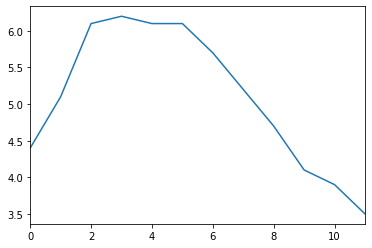

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

In [28]:
people_dict = {

"weight": pd.Series([68, 83, 112],index=["alice",
"bob", "charles"]),

"birthyear": pd.Series([1984, 1985, 1992],
index=["bob", "alice", "charles"], name="year"),

"children": pd.Series([0, 3], index=["charles",
"bob"]),

"hobby": pd.Series(["Biking", "Dancing"],
index=["alice", "bob"]),
}

people = pd.DataFrame(people_dict)
people



,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [29]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [30]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [31]:
d2 = pd.DataFrame(
people_dict,
columns=["birthyear", "weight", "height"],
index=["bob", "alice", "eugene"]
)

print(d2)

        birthyear  weight height
bob        1984.0    83.0    NaN
alice      1985.0    68.0    NaN
eugene        NaN     NaN    NaN


In [32]:
people.loc["charles"]

weight        112
birthyear    1992
children        0
hobby         NaN
Name: charles, dtype: object

In [34]:
people.iloc[2]

weight        112
birthyear    1992
children        0
hobby         NaN
Name: charles, dtype: object

In [35]:
people.iloc[1:3]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [36]:
people[people["birthyear"] < 1990]

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing


In [45]:
# Adds another column "over 30"
people["over 30"] = people["age"] > 30
people

,weight,hobby,age,over 30
alice,68,Biking,31,True
bob,83,Dancing,32,True
charles,112,NaN,24,False


In [50]:
# Removes "birthyear" and "children" columns
birthyears = people.pop("age")

KeyError: 'age'

In [51]:
birthyears

alice      31
bob        32
charles    24
Name: age, dtype: int64

In [52]:
people["pets"] = pd.Series({

"bob": 0,
"charles": 5,
"eugene":1
})

In [53]:
people

,weight,hobby,over 30,pets
alice,68,Biking,True,NaN
bob,83,Dancing,True,0.0
charles,112,NaN,False,5.0


In [54]:
people.insert(1, "height", [172, 181, 185])
people

,weight,height,hobby,over 30,pets
alice,68,172,Biking,True,NaN
bob,83,181,Dancing,True,0.0
charles,112,185,NaN,False,5.0


In [55]:
people.sort_index(ascending=False)

,weight,height,hobby,over 30,pets
charles,112,185,NaN,False,5.0
bob,83,181,Dancing,True,0.0
alice,68,172,Biking,True,NaN


In [56]:
people.sort_index(ascending=True)

,weight,height,hobby,over 30,pets
alice,68,172,Biking,True,NaN
bob,83,181,Dancing,True,0.0
charles,112,185,NaN,False,5.0


In [58]:
people.sort_values(by="height", inplace=True)
people

,weight,height,hobby,over 30,pets
alice,68,172,Biking,True,NaN
bob,83,181,Dancing,True,0.0
charles,112,185,NaN,False,5.0


In [59]:
people.insert(0, "age", [34, 31, 24])
people

,age,weight,height,hobby,over 30,pets
alice,34,68,172,Biking,True,NaN
bob,31,83,181,Dancing,True,0.0
charles,24,112,185,NaN,False,5.0


In [61]:
(people

.assign(body_mass_index = lambda df:df["weight"]
/ (df["height"] / 100) ** 2)
.assign(overweight = lambda df:
df["body_mass_index"] > 25)

)

,age,weight,height,hobby,over 30,pets,body_mass_index,overweight
alice,34,68,172,Biking,True,NaN,22.985398,False
bob,31,83,181,Dancing,True,0.0,25.335002,True
charles,24,112,185,NaN,False,5.0,32.724617,True


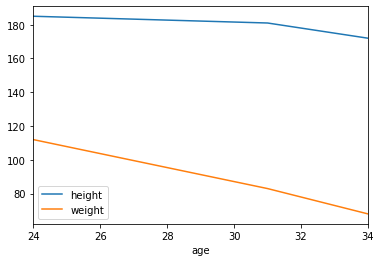

In [62]:
people.plot(

kind = "line",
x = "age",
y = ["height", "weight"]
)

plt.show()

In [65]:
my_df = pd.DataFrame(
[

["Biking", 68.5, 1985, np.nan],
["Dancing", 83.1, 1984, 3]
],

columns=["hobby","weight","birthyear","children"],
index=["alice", "bob"]

)

my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


In [66]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

In [67]:
for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()

# my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



In [68]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


In [70]:
# The head method returns the top 5 rows
my_df_loaded.head()

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


In [71]:
# The tail method returns the bottom 5 rows
my_df_loaded.tail()

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


In [73]:
my_df_loaded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, alice to bob
Data columns (total 4 columns):
hobby        2 non-null object
weight       2 non-null float64
birthyear    2 non-null int64
children     1 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 80.0+ bytes
